<a href="https://colab.research.google.com/github/vikasvr1997/fmml2021/blob/main/M2L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#modelu 2: feature normalization ,nearest neighbor classifier
#lab 2: retrival,performance evaluation and metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [ ]:
cancer=datasets.load_breast_cancer(as_frame=True)

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
x=cancer.data
y=cancer.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=17)

In [ ]:
neighbors=[]
scores_list=[]

for k in range(1,25):
  neighbors.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  scores_list.append(knn.score(x_test,y_test))

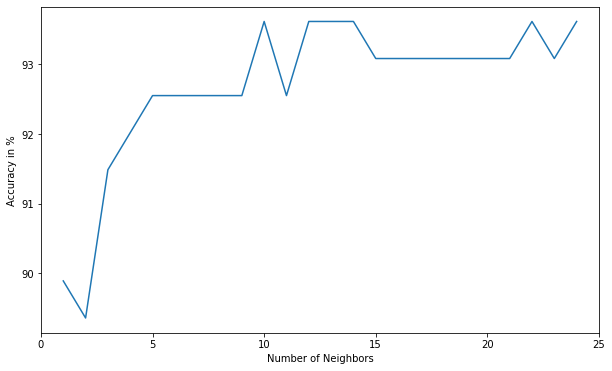

In [ ]:
accuracy=[100*x for x in scores_list]
plt.figure(figsize=(10,6))
plt.plot(neighbors,accuracy)
plt.xlim([0,25])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [ ]:
max_accu=max(accuracy)
optimal_ks=[neighbors[i] for i,j in enumerate(accuracy) if j==max_accu]
print(max_accu)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In [ ]:
#the above ks can be different for different splitting and have to be found experimetnally

In [ ]:
#splitting of dataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from collections import Counter
#set randomseed
rng=np.random.default_rng(seed=42)

In [ ]:
dataset=datasets.fetch_california_housing()
print(dataset.DESCR)
print(dataset.keys())

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
dataset.target=dataset.target.astype(np.int)
print(dataset.data.shape)
print(dataset.target.shape)

(20640, 8)
(20640,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
#for 1NN
def NN1(traindata,trainlabel,query):
  diff=traindata-query
  sq=diff*diff
  dist=sq.sum(1)
  label=trainlabel[np.argmin(dist)]
  return label

In [ ]:
def NN(traindata,trainlabel,testdata):
  predlabel=np.array([NN1(traindata,trainlabel,i) for i in testdata])
  return predlabel

In [ ]:
#randomclassifier to randomly allot label to each sample
def RandomClassifier(traindata,trainlabel,testdata):
  classes=np.unique(trainlabel)
  rints=rng.integers(low=0,high=len(classes),size=len(testdata))
  predlabel=classes[rints]
  return predlabel

In [ ]:
def split(data,label,percent):
  #a random number each sample
  rnd=rng.random(len(label))
  split1=rnd<percent
  split2=rnd>percent
  split1data=data[split1,:]
  split1label=label[split1]
  split2data=data[split2,:]
  split2label=label[split2]
  return split1data,split1label,split2data,split2label

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


In [ ]:
#experimants with splits
#all train data=train data +validation data
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,75/100)

In [ ]:
trainpred=NN(traindata,trainlabel,traindata)
trainaccuracy=accuracy_score(trainlabel,trainpred)
print('train accuracy using knn is',trainaccuracy)

trainpred=RandomClassifier(traindata,trainlabel,traindata)
trainaccuracy=accuracy_score(trainlabel,trainpred)
print('train accuracy using random classifier is',trainaccuracy)

train accuracy using knn is 1.0
train accuracy using random classifier is 0.164375808538163


In [ ]:
#accuracy for train data will be 1 and for randoml classifier is close to 1/(number of classes)

In [ ]:
#for validation set
valpred=NN(traindata,trainlabel,valdata)
valaccuracy=accuracy_score(vallabel,valpred)
print('validation accuracy using nearest neighbor is',valaccuracy)

valpred=RandomClassifier(traindata,trainlabel,valdata)
valaccuracy=accuracy_score(vallabel,valpred)
print('validaition accuracy using random classifier is',valaccuracy)

validation accuracy using nearest neighbor is 0.34108527131782945
validaition accuracy using random classifier is 0.1688468992248062


In [ ]:
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,75/100)
valpred=NN(traindata,trainlabel,valdata)
valaccuracy=accuracy_score(vallabel,valpred)
print('validation accuracy of nearest neighbor is',valaccuracy)

validation accuracy of nearest neighbor is 0.34048257372654156


In [ ]:
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,75/100)
valpred=NN(traindata,trainlabel,valdata)
valaccuracy=accuracy_score(vallabel,valpred)
print('validation accuracy of nearest neighbor is',valaccuracy)

validation accuracy of nearest neighbor is 0.33925097276264593


In [ ]:
#accuracy of this on test set
testpred=NN(alltraindata,alltrainlabel,testdata)
testaccuracy=accuracy_score(testlabel,testpred)
print('test accuracy is',testaccuracy)

test accuracy is 0.34917953667953666


In [ ]:
#try it yourself and answer
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,80/100)
valpred=NN(traindata,trainlabel,valdata)
valaccuracy=accuracy_score(vallabel,valpred)
print('validation accuracy of nearest neighbor is',valaccuracy)

testpred=NN(alltraindata,alltrainlabel,testdata)
testaccuracy=accuracy_score(testlabel,testpred)
print('test accuracy is',testaccuracy)

validation accuracy of nearest neighbor is 0.33763440860215055
test accuracy is 0.34917953667953666


In [ ]:
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,70/100)
valpred=NN(traindata,trainlabel,valdata)
valaccuracy=accuracy_score(vallabel,valpred)
print('validation accuracy of nearest neighbor is',valaccuracy)

testpred=NN(alltraindata,alltrainlabel,testdata)
testaccuracy=accuracy_score(testlabel,testpred)
print('test accuracy is',testaccuracy)

validation accuracy of nearest neighbor is 0.33660589060308554
test accuracy is 0.34917953667953666


In [ ]:
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,85/100)
valpred=NN(traindata,trainlabel,valdata)
valaccuracy=accuracy_score(vallabel,valpred)
print('validation accuracy of nearest neighbor is',valaccuracy)

testpred=NN(alltraindata,alltrainlabel,testdata)
testaccuracy=accuracy_score(testlabel,testpred)
print('test accuracy is',testaccuracy)

validation accuracy of nearest neighbor is 0.332109343125255
test accuracy is 0.34917953667953666


In [ ]:
traindata,trainlabel,valdata,vallabel=split(alltraindata,alltrainlabel,65/100)
valpred=NN(traindata,trainlabel,valdata)
valaccuracy=accuracy_score(vallabel,valpred)
print('validation accuracy of nearest neighbor is',valaccuracy)

testpred=NN(alltraindata,alltrainlabel,testdata)
testaccuracy=accuracy_score(testlabel,testpred)
print('test accuracy is',testaccuracy)

validation accuracy of nearest neighbor is 0.3361948142957253
test accuracy is 0.34917953667953666


In [ ]:
#the accuracy of validation set is almost the same if there is a small in the split ratio between train and val data
#the test to alltrain data percentage should be in (20-35) for a good accuracy
#for validation data ,i think 20% of all train data will be good

In [ ]:
#multiple splits 
#cross validation
# averages if val accuracy as test accuracy estimation

In [ ]:
def AverageAccuracy(alldata,alllabel,splitpercent,iterations,classifier=NN):
  accuracy=0
  for i in range(iterations):
    traindata,trainlabel,valdata,vallabel=split(alldata,alllabel,splitpercent)
    valpred=classifier(traindata,trainlabel,valdata) #we can also use RandomClassifier here
    accuracy+=accuracy_score(vallabel,valpred)
  return accuracy/iterations  

In [ ]:
print('average validation accuracy is',AverageAccuracy(alltraindata,alltrainlabel,75/100,10,classifier=NN))
testpred=NN(alltraindata,alltrainlabel,testdata)
print('test accuracy is',accuracy_score(testlabel,testpred))

average validation accuracy is 0.33727121402438226
test accuracy is 0.34917953667953666


In [ ]:
#this is a simple cross validation
#well  known algorithms for cross validation are k-fold cross validation,leave-one-out and so on

In [ ]:
#knn using a different train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1024)
#changing random state splits the data differently

In [ ]:
neighbors=[]
scores_list=[]

for k in range(1,25):
  neighbors.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  scores_list.append(knn.score(x_test,y_test))

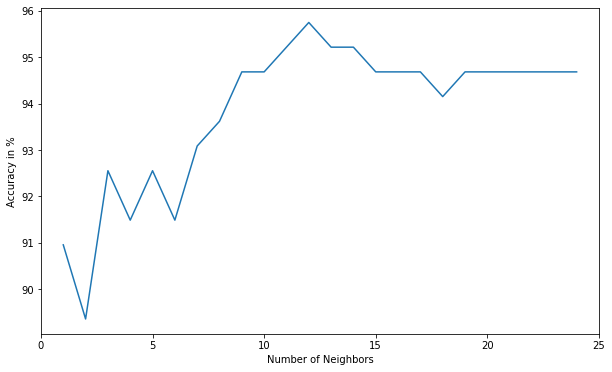

In [ ]:
accuracy=[100*x for x in scores_list]
plt.figure(figsize=(10,6))
plt.plot(neighbors,accuracy)
plt.xlim([0,25])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [ ]:
max_accu=max(accuracy)
optimal_ks=[neighbors[i] for i,j in enumerate(accuracy) if j==max_accu]
print(max_accu)
print(optimal_ks)

95.74468085106383
[12]


In [ ]:
#trying with different split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1024)

In [ ]:
neighbors=[]
scores_list=[]

for k in range(1,25):
  neighbors.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  scores_list.append(knn.score(x_test,y_test))

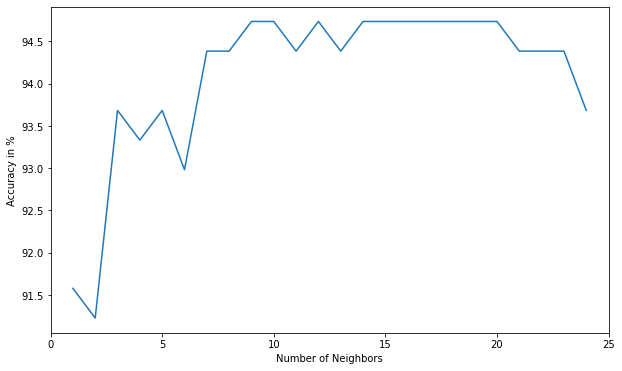

In [ ]:
accuracy=[100*x for x in scores_list]
plt.figure(figsize=(10,6))
plt.plot(neighbors,accuracy)
plt.xlim([0,25])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [ ]:
max_accu=max(accuracy)
optimal_ks=[neighbors[i] for i,j in enumerate(accuracy) if j==max_accu]
print(max_accu)
print(optimal_ks)

94.73684210526315
[9, 10, 12, 14, 15, 16, 17, 18, 19, 20]


In [ ]:
#the average accuracy of validation data is a good estimate of test accuracy